# Table of Contents

1. **Importing Libraries and Data Frame:**
   - Basic statistics and info.

2. **Scatterplot Pair Plot to Explore the Relationship**

3. **Stating Main Hypothesis**

4. **Reshape Variables**

5. **Splitting the Data into Training and Test Sets**

6. **Regression Analysis:**
   - Regression Line on the Test Set.
   - Model Performance Statistics.
   - Compare Predicted and Actual y Values.

7. **Thoughts and Conclusions**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Importing 'df_final' data set:

In [4]:
# Define the file path
file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\df_filled.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()

,Country Name,Country Code,Year,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,NE.CON.TOTL.KD.ZG,NE.EXP.GNFS.KD.ZG,NE.GDI.TOTL.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNS.ICTR.ZS,SL.UEM.TOTL.ZS
0,Brazil,BRA,2003,1.813401,69.824196,-0.026542,11.015939,-2.692671,-0.483497,5.582337e+11,1.140829,16.417942,11.169
1,Brazil,BRA,2004,2.713532,74.430628,3.912306,14.473780,10.322010,10.364045,6.692894e+11,5.759965,18.855019,10.072
2,Brazil,BRA,2005,1.733894,79.543667,3.855949,9.644190,-2.497390,7.461346,8.916338e+11,3.202132,18.114096,10.551
3,Brazil,BRA,2006,1.753126,82.871431,4.874538,4.837428,8.474882,17.762585,1.107627e+12,3.961989,18.409816,9.692
4,Brazil,BRA,2007,3.190826,85.889006,5.823590,6.176102,15.915422,19.557599,1.397114e+12,6.069871,19.346360,9.280


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          168 non-null    object 
 1   Country Code          168 non-null    object 
 2   Year                  168 non-null    int64  
 3   BX.KLT.DINV.WD.GD.ZS  168 non-null    float64
 4   FP.CPI.TOTL           168 non-null    float64
 5   NE.CON.TOTL.KD.ZG     168 non-null    float64
 6   NE.EXP.GNFS.KD.ZG     168 non-null    float64
 7   NE.GDI.TOTL.KD.ZG     168 non-null    float64
 8   NE.IMP.GNFS.KD.ZG     168 non-null    float64
 9   NY.GDP.MKTP.CD        168 non-null    float64
 10  NY.GDP.MKTP.KD.ZG     168 non-null    float64
 11  NY.GNS.ICTR.ZS        168 non-null    float64
 12  SL.UEM.TOTL.ZS        168 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 17.2+ KB


In [6]:
df.describe()

,Year,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,NE.CON.TOTL.KD.ZG,NE.EXP.GNFS.KD.ZG,NE.GDI.TOTL.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNS.ICTR.ZS,SL.UEM.TOTL.ZS
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000
mean,2013.000000,2.255321,124.901570,4.617626,5.619118,7.863071,4.761111,2.113651e+12,4.591077,28.461613,7.098994
std,6.073403,1.238615,75.458492,3.622921,7.401287,36.660268,22.873762,3.379598e+12,3.651515,10.813937,3.214788
min,2003.000000,-0.271773,56.054279,-9.254682,-14.623753,-137.635084,-261.884175,2.158077e+11,-8.624556,12.250796,2.812000
25%,2008.000000,1.445905,90.312158,2.806353,1.587329,2.963448,1.630397,6.694356e+11,2.766885,19.484974,4.550000
50%,2013.000000,2.088128,111.691126,4.782348,5.619118,7.863071,5.728842,9.506183e+11,5.025081,26.038929,6.133500
75%,2018.000000,3.040268,137.321404,6.807706,8.924106,8.539189,10.601115,1.824198e+12,6.938035,34.483326,9.215250
max,2023.000000,6.230800,834.593143,16.303209,29.599295,435.616000,34.981831,1.788178e+13,14.230861,54.179995,19.370000


---

### Scatterplot to Explore the Relationship between GDP Growth and Gross Savings:

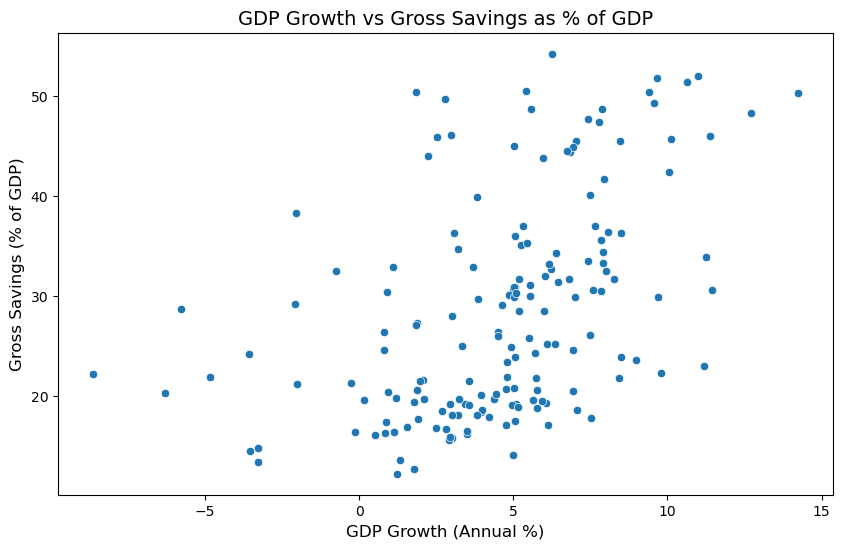

In [9]:
# Define the save path
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz\6.4 Vizs'

# Scatterplot: GDP Growth vs Gross Savings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NY.GDP.MKTP.KD.ZG', y='NY.GNS.ICTR.ZS', data=df)
plt.title('GDP Growth vs Gross Savings as % of GDP', fontsize=14)
plt.xlabel('GDP Growth (Annual %)', fontsize=12)
plt.ylabel('Gross Savings (% of GDP)', fontsize=12)

plt.savefig(f'{output_path}/GDP_vs_Savings.png')  # Save the plot
plt.show()

### Pair Plot:

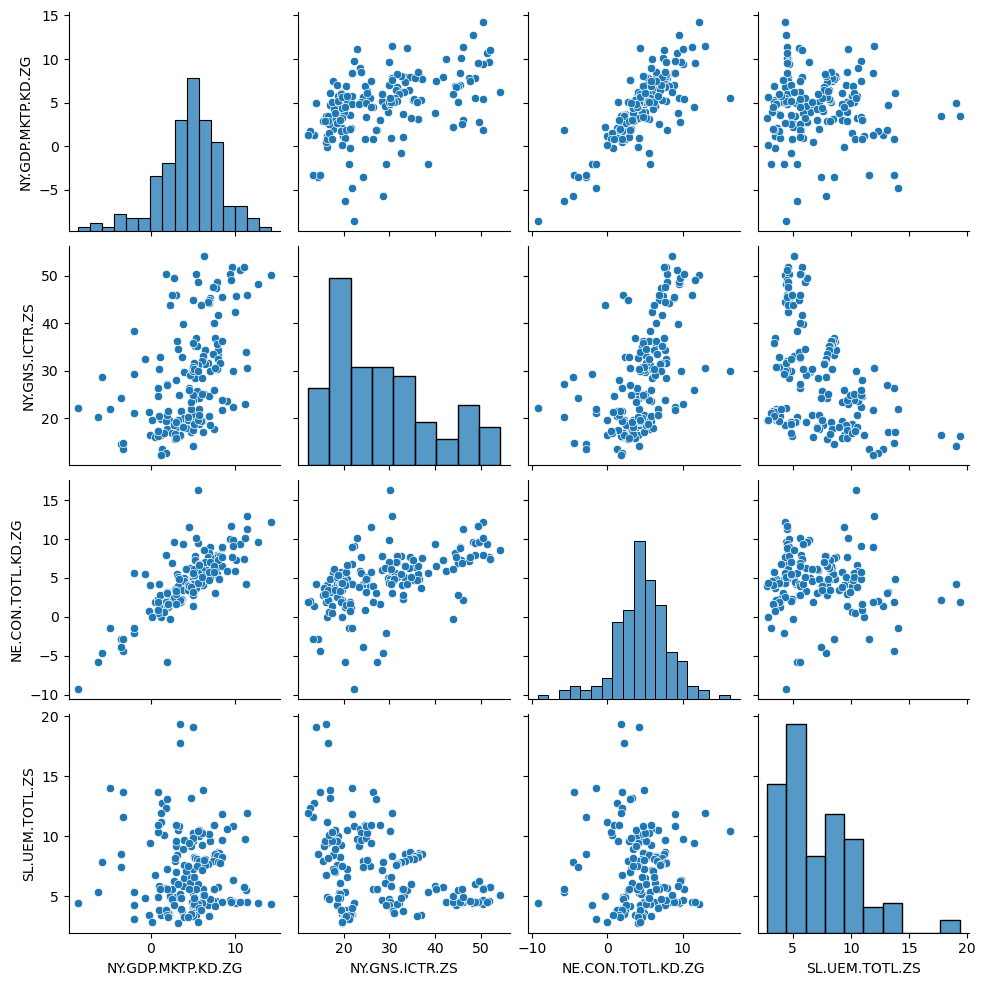

In [11]:
# Pair plot for selected variables
columns_of_interest = ['NY.GDP.MKTP.KD.ZG', 'NY.GNS.ICTR.ZS', 'NE.CON.TOTL.KD.ZG', 'SL.UEM.TOTL.ZS']
sns.pairplot(df[columns_of_interest])
plt.savefig(f'{output_path}/Pairplot_GDP_Savings_Consumption_Unemployment.png')  # Save the plot
plt.show()

---

Stating main hypothesis:

### - *If* a country's GDP growth increases, *then* consumption growth will also increase, following a strong positive correlation between these two indicators.

---

### Steps to Reshape Variables:

- X (Independent Variable): GDP growth (`NY.GDP.MKTP.KD.ZG`)
- y (Dependent Variable): Consumption growth (`NE.CON.TOTL.KD.ZG`
  

rise.rise.rise.rise.

In [45]:
# Independent variable (GDP Growth)
X = df['NY.GDP.MKTP.KD.ZG'].values.reshape(-1, 1)  # Reshaping to a 2D array 

# Dependent variable (Consumption Growth)
y = df['NE.CON.TOTL.KD.ZG'].values.reshape(-1, 1)  # Reshaping to a 2D array 

# Display the reshaped arrays
print("X (GDP Growth):", X[:5])  # Display the first 5 rows of X
print("y (Consumption Growth):", y[:5])  # Display the first 5 rows of y

X (GDP Growth): [[1.140829  ]
 [5.75996464]
 [3.20213206]
 [3.96198871]
 [6.06987061]]
y (Consumption Growth): [[-0.02654245]
 [ 3.91230608]
 [ 3.85594909]
 [ 4.87453762]
 [ 5.82359043]]


### Splitting the data into training and test sets
Versions will be used to train the model.

In [56]:
# Splitting the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the split data
print(f"X_train shape (GDP Growth): {X_train.shape}")
print(f"X_test shape (GDP Growth): {X_test.shape}")
print(f"y_train shape (Consumption Growth): {y_train.shape}")
print(f"y_test shape (Consumption Growth): {y_test.shape}")

X_train shape (GDP Growth): (117, 1)
X_test shape (GDP Growth): (51, 1)
y_train shape (Consumption Growth): (117, 1)
y_test shape (Consumption Growth): (51, 1)


### Regression Analysis

1. Fit the model to the training set: Train the model using the 70% of the data in the training set.
   
2. Create predictions for the test set: Use the model to predict y values for the test data.

In [60]:
# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the values for y on the test set
y_pred = model.predict(X_test)

# Display the first 5 predictions and corresponding actual values
print("Predicted Consumption Growth (first 5):", y_pred[:5])
print("Actual Consumption Growth (first 5):", y_test[:5])

Predicted Consumption Growth (first 5): [[4.13046616]
 [7.36192022]
 [5.18993326]
 [8.70726829]
 [1.96647733]]
Actual Consumption Growth (first 5): [[ 9.38194357]
 [ 7.97191287]
 [ 5.36807047]
 [11.708006  ]
 [ 2.84451386]]


### Regression Line on the Test Set

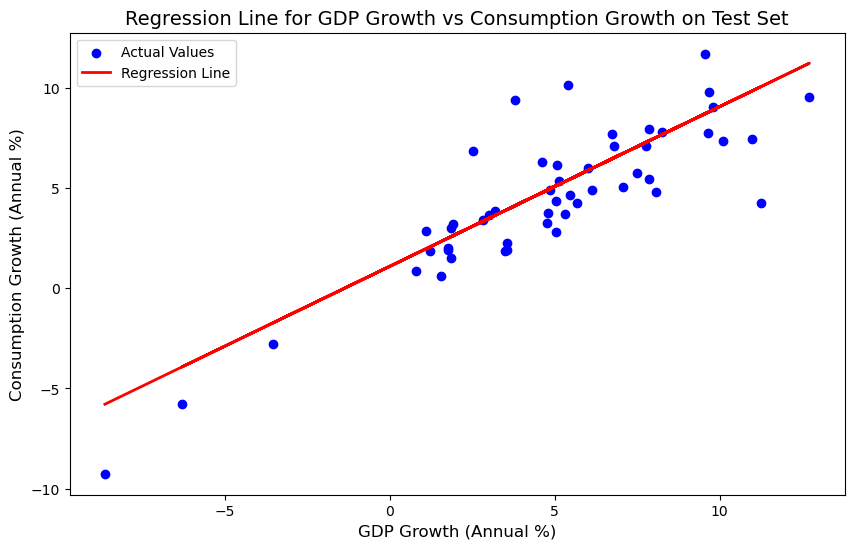

In [62]:
# Create a scatter plot for the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')

# Plot the regression line using the predicted values
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Add titles and labels
plt.title('Regression Line for GDP Growth vs Consumption Growth on Test Set', fontsize=14)
plt.xlabel('GDP Growth (Annual %)', fontsize=12)
plt.ylabel('Consumption Growth (Annual %)', fontsize=12)

# Add a legend
plt.legend()

# Save the plot
plt.savefig(r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz\Final Viz\GDP_vs_Consumption_Growth_Regression.png')

# Display the plot
plt.show()

The chart shows that there is a clear positive relationship between GDP growth and consumption growth — when GDP goes up, consumption tends to increase as well. However, the data points are fairly spread out from the regression line, especially at higher GDP growth rates, which suggests that the model isn't capturing all the factors influencing consumption. While GDP growth does play a role in boosting consumption, it's clear that other influences are at play. Overall, the trend is there, but the model doesn't provide an exact prediction.

### Slope, Mean Squared Error (MSE), and R² score for the regression model:

In [69]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the Slope (Coefficient) of the regression line
print('Slope', model.coef_)

# Print the Mean Squared Error and R² score
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² score: {r2}')


Slope [[0.79743434]]
Mean Squared Error (MSE): 3.7667990689285755
R² score: 0.7304306918872915


### Compare Predicted and Actual y Values in a DataFrame:

In [73]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test.flatten(),  # Convert y_test to 1D array
    'Predicted': y_pred.flatten()  # Convert y_pred to 1D array
})

# Display the first few rows of the DataFrame
comparison_df.head()

,Actual,Predicted
0,9.381944,4.130466
1,7.971913,7.361920
2,5.368070,5.189933
3,11.708006,8.707268
4,2.844514,1.966477


### Thoughts and Conclusions:

The model shows that as GDP growth increases, consumption growth tends to rise as well, with a slope of **0.80** indicating a positive relationship. The **MSE of 3.77** and **R² score of 0.73** suggest that the model explains about 73% of the variation in consumption growth, which points to a fairly strong fit. However, there are still some differences between the actual and predicted values. For example, in one case, the actual consumption growth was **9.38%**, while the model predicted **4.13%**, indicating that while the overall trend is captured, individual predictions can sometimes be off.

This variance may be due to other factors not included in the model, such as inflation, household income, or consumer behavior, which likely also impact consumption growth. Further analysis using other methods will be required to better understand these influences and refine the model's accura, , especially at higher levels of GDP growth where the discrepancies tend to be larger.